# PHIStruct: Improving phage-host interaction prediction at low sequence similarity settings using structure-aware protein embeddings

<b>Mark Edward M. Gonzales<sup>1, 2</sup>, Jennifer C. Ureta<sup>1, 2, 3</sup> & Anish M.S. Shrestha<sup>1, 2</sup></b>

<sup>1</sup> Bioinformatics Lab, Advanced Research Institute for Informatics, Computing and Networking, De La Salle University, Manila 1004, Philippines <br>
<sup>2</sup> Department of Software Technology, College of Computer Studies, De La Salle University, Manila 1004, Philippines <br>
<sup>3</sup> Walter and Eliza Hall Institute of Medical Research, Melbourne, Victoria, 3052, Australia

✉️ gonzales.markedward@gmail.com, jennifer.ureta@gmail.com, anish.shrestha@dlsu.edu.ph

<hr>

# 💡 Prerequisites

The prerequisite files (i.e., the results of evaluating the models' performance) &mdash; which are saved in `temp/results` &mdash; are already included when the repository was cloned. <br>

<hr>

# Part I: Preliminaries

Import the necessary libraries and modules.

In [1]:
import pickle

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

import ConstantsUtil

%load_ext autoreload
%autoreload 2

In [2]:
constants = ConstantsUtil.ConstantsUtil()

<hr>

# Part II: Draw confusion matrices

#### Change the values of `SIMILARITY` and `CONFIDENCE` as needed.
- `SIMILARITY` refers to the maximum train-versus-test sequence similarity threshold.
- `CONFIDENCE` refers to the confidence threshold.

In [3]:
SIMILARITY = 40
CONFIDENCE = 0

threshold = CONFIDENCE // 10

Declare constant variables for readability of subsequent code.

In [4]:
Y_TEST = -3
Y_PRED = -1

In [5]:
labels = [
    "enterococcus",
    "staphylococcus",
    "klebsiella",
    "acinetobacter",
    "pseudomonas",
    "enterobacter",
    "escherichia",
]

#### Change the `normalize` argument of `cm` as needed.

In [6]:
model = f"saprot_relaxed_r3-mlp-eskapee-smotetomek-{SIMILARITY}"
models = [model]
model_results = []
for model in models:
    with open(f"{constants.TEMP_RESULTS}/{model}.pickle", "rb") as f:
        model_results.append(pickle.load(f))

y_test = model_results[models.index(model)][threshold][Y_TEST]
y_pred = model_results[models.index(model)][threshold][Y_PRED]
cm = confusion_matrix(y_test, y_pred, normalize="true", labels=labels)
labels = [label.capitalize() for label in labels]

[Text(0, 0.5, 'Enterococcus'),
 Text(0, 1.5, 'Staphylococcus'),
 Text(0, 2.5, 'Klebsiella'),
 Text(0, 3.5, 'Acinetobacter'),
 Text(0, 4.5, 'Pseudomonas'),
 Text(0, 5.5, 'Enterobacter'),
 Text(0, 6.5, 'Escherichia')]

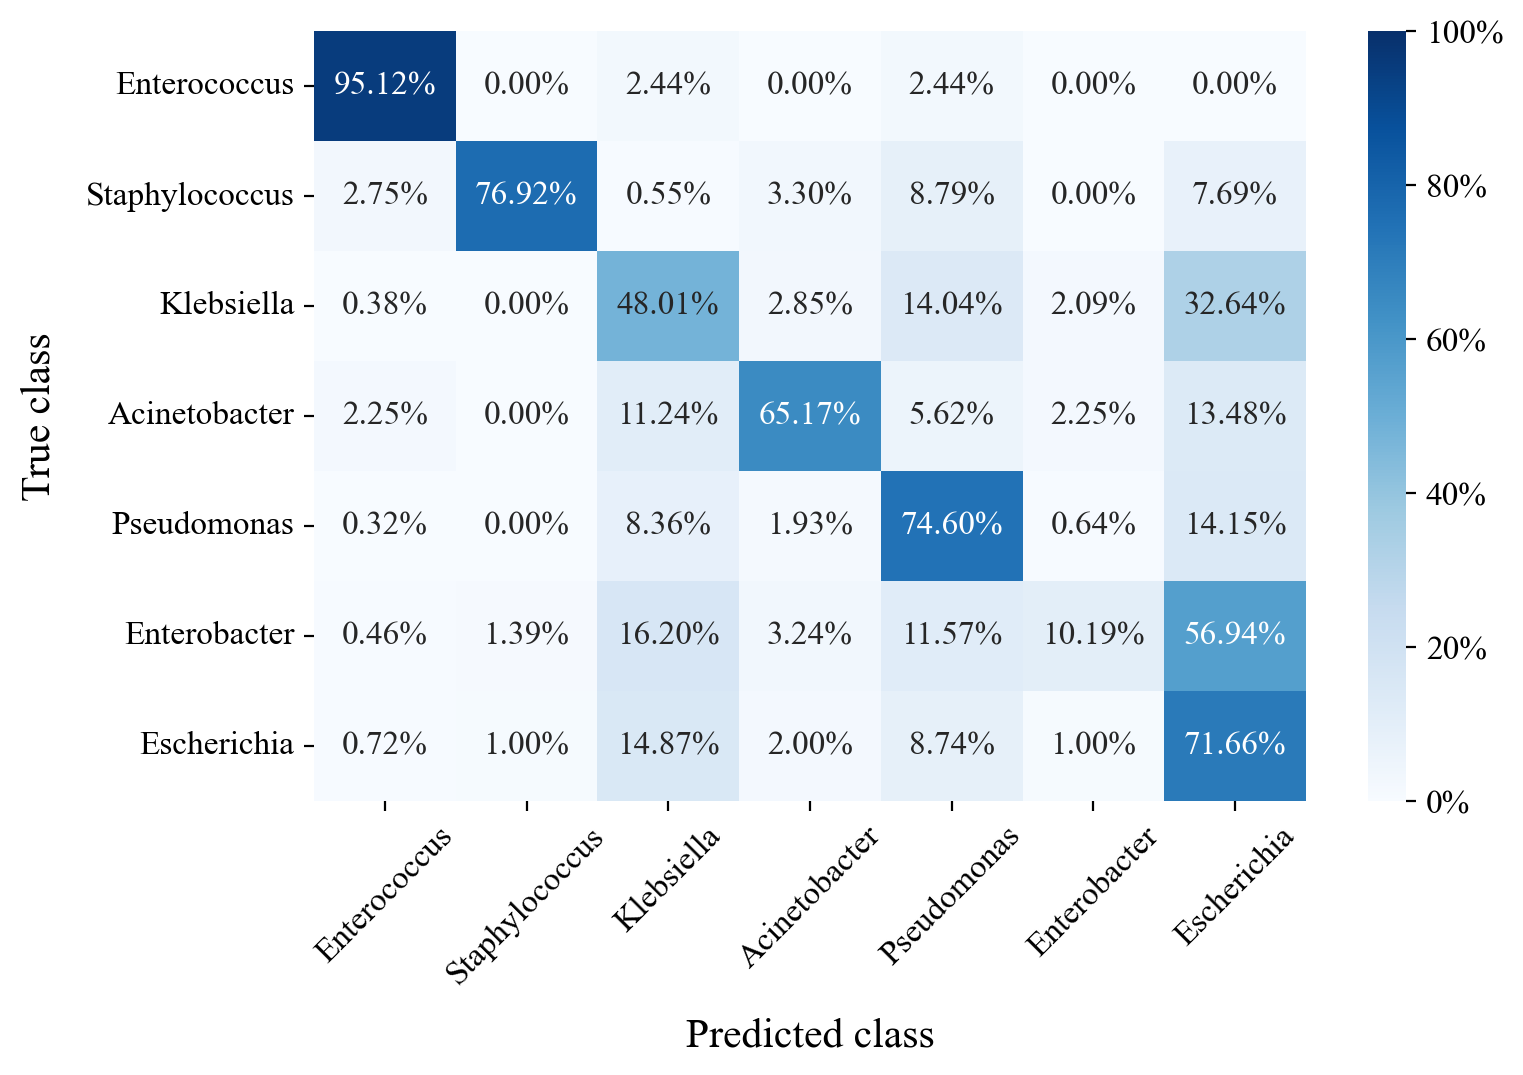

In [7]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax = sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", ax=ax, vmin=0, vmax=1)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.set_ticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])

ax.set_xlabel("Predicted class", labelpad=10, fontsize=15)
ax.tick_params(axis="x", labelrotation=45)
ax.tick_params(axis="y", labelrotation=360)
ax.set_ylabel("True class", labelpad=10, fontsize=15)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)